1) Loading data
CRITERION: 0.368259756751
NMI: 0.932489400803
ARI: 0.9601223115919695
ACCURACY:0.986635826266
[[1006   26    1]
 [   3 1453    4]
 [   2   16 1380]]


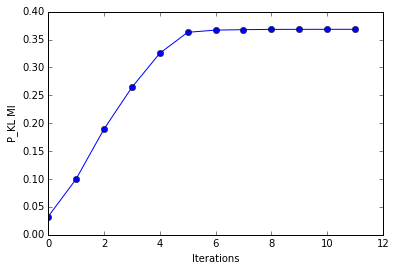

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np, scipy.sparse as sp, scipy.io as io
from sklearn.metrics import confusion_matrix
from coclust.CoclustSpecMod import CoclustSpecMod
from coclust.CoclustInfo import CoclustInfo
from coclust.utils.evaluation import print_NMI_and_ARI, plot_convergence, print_accuracy
# Retrieve the Classic3  document-term matrix from a matlab file
print("1) Loading data")
file_name = "../datasets/classic3.mat"
matlab_dict = io.loadmat(file_name)
X = matlab_dict['A']
    
# Create and fit a model with 3 co-clusters
model = CoclustInfo(n_row_clusters=3, n_col_clusters=3, n_init=4)
model.fit(X)
    
    
# Evaluate the results
print("CRITERION:",model.criterion)
true_row_labels=matlab_dict['labels'].flatten()
predicted_row_labels = model.row_labels_
print_NMI_and_ARI( true_row_labels, predicted_row_labels)
cm=confusion_matrix(true_row_labels,predicted_row_labels)
print_accuracy(cm,X.shape[0],3)
print(cm)
    
# Show convergence
plot_convergence(model.criterions, 'P_KL MI',marker='o')